In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In [2]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)

ads = [adA, adB, adC, adD, adE]

In [3]:
n_test = 10000
n_prod = 90000
n_ads = len(ads)
Q = np.zeros(n_ads)  # Q, action values
N = np.zeros(n_ads)  # N, total impressions
total_reward = 0
avg_rewards = []  # Save average rewards over time

In [4]:
# A/B/n test
for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad()  # Observe reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

In [5]:
best_ad_index = np.argmax(Q)  # Find the best action
print("The best performing ad is {}".format(chr(ord('A') + best_ad_index)))

The best performing ad is D


In [6]:
ad_chosen = best_ad_index
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

In [7]:
df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])

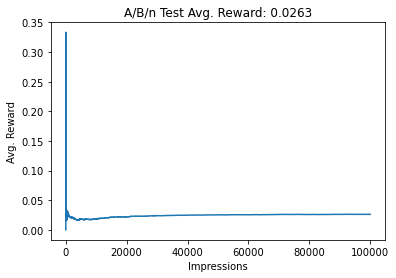

In [8]:
df_reward_comparison['A/B/n'].plot(title="A/B/n Test Avg. Reward: {:.4f}"
                                    .format(avg_reward_so_far))
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.show()

In [9]:
print(Q)

# Actual probabilities of rewards
# adA = BernoulliBandit(0.004)
# adB = BernoulliBandit(0.016)
# adC = BernoulliBandit(0.02)
# adD = BernoulliBandit(0.028)
# adE = BernoulliBandit(0.031)

[0.00557527 0.01866801 0.0165     0.02848576 0.02250489]
